In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import perceptron

%matplotlib inline

In [3]:
dataset = pd.DataFrame.from_items([
                            ('Mass',   [10.0, 20.0, 5.0, 2.0, 3.0, 3.0, 10.0, 15.0, 5.0]), 
                            ('Length', [6.0,  5.0,  4.0, 5.0, 4.5, 6.0, 7.0,  8.0,  9.0]),
                            ('Class',  ['Lorry', 'Lorry', 'Van', 'Van', 'Van', 'Lorry', 'Lorry', 'Lorry', 'Lorry']),
                            ('ClassId',[0,0,1,1,1,0,0,0,0])
                        ])
dataset.head(10)

,Mass,Length,Class,ClassId
0,10.0,6.0,Lorry,0
1,20.0,5.0,Lorry,0
2,5.0,4.0,Van,1
3,2.0,5.0,Van,1
4,3.0,4.5,Van,1
5,3.0,6.0,Lorry,0
6,10.0,7.0,Lorry,0
7,15.0,8.0,Lorry,0
8,5.0,9.0,Lorry,0


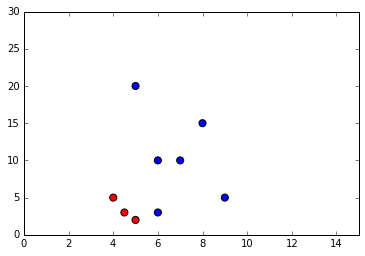

In [4]:
# plot the dataset
# seperating classes using the colors blue and red
# blue : lorry, red : van

class_colors = np.array(['b', 'r'])

# plot the dataset, "Length" is x axis, "Mass" is y axis
plt.ylim([0,30])
plt.xlim([0,15])
length_min_max = plt.xlim()
mass_min_max = plt.ylim()

plt.scatter(dataset.Length, dataset.Mass, c=class_colors[dataset.ClassId], s=50)

In [5]:
# make perceptron object (m_perceptron)
m_perceptron = perceptron.Perceptron(n_iter=1000, verbose=0, random_state=None, fit_intercept=True, eta0=0.001)

# train the perceptron object (m_perceptron)
m_perceptron.fit(dataset[['Length', 'Mass']],dataset['ClassId'])

# print the coefficients matrix and bias
coefficients = m_perceptron.coef_;
bias = m_perceptron.intercept_;
print ("coefficients = " + str(coefficients))
print ("bias = " + str(bias))

coefficients = [[-0.0045 -0.002 ]]
bias = [ 0.029]


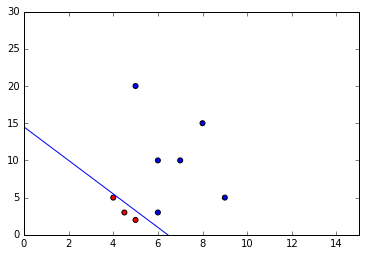

In [6]:
# print the decision boundry
# y = theta0 + theta1 * x1 + theta2 * x2 . . .
# y = bias + coefficients[0][0] * length + coefficients[0][1] * mass
# for plotting the decision boundry equally divide the x axis of the plot

xx1_length = np.linspace(start=length_min_max[0], stop=length_min_max[1], num=100, endpoint=True)

# using the values of the equally divided x axis, calculate the y axis
# using the equation of perceptron (bias and coefficients)
yy = (-bias -(xx1_length * coefficients[0][0])) / coefficients[0][1];

# limit the plot area on x and y axises
plt.ylim([0,30])
plt.xlim([0,15])
# plot the dataset
plt.scatter(dataset.Length, dataset.Mass, c=class_colors[dataset.ClassId], s=25)
# plot the decision boundry
plt.plot(xx1_length,yy)

In [7]:
# run prediction for all the values in the dataset
prediction = m_perceptron.predict(dataset[['Length','Mass']])
print (prediction)

[0 0 1 1 1 0 0 0 0]


In [8]:
# run prediction for an individual item
# having length 11 and mass 12
prediction = m_perceptron.predict([[11,12]])
print (prediction)

[0]


In [9]:
# run prediction for an individual item
# having length 2 and mass 7
prediction = m_perceptron.predict([[2,7]])
print (prediction)

[1]


In [13]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,1,1,0,0,0,0]
y_pred = [0,0,1,1,1,0,0,0,0]
confusion_matrix(y_true, y_pred)

array([[6, 0],
       [0, 3]])